In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
config = {
    'domain': 'protein',
    'supervision': 'generative',
    'traditional_split': 1,
    'disc_model_class': 'logreg',
    'display_learned_accuracies': True,
}

In [3]:
# Get DB connection string and add to globals
# NOTE: $SNORKELDB must be set before any snorkel imports
import os

default_db_name = 'babble_' + config['domain'] + ('_debug' if config.get('debug', False) else '')
DB_NAME = config.get('db_name', default_db_name)
if 'postgres' in config and config['postgres']:
    DB_TYPE = 'postgres'
else:
    DB_TYPE = 'sqlite'
    DB_NAME += '.db'
DB_ADDR = "localhost:{0}".format(config['db_port']) if 'db_port' in config else ""
os.environ['SNORKELDB'] = '{0}://{1}/{2}'.format(DB_TYPE, DB_ADDR, DB_NAME)
print("$SNORKELDB = {0}".format(os.environ['SNORKELDB']))

$SNORKELDB = sqlite:///babble_protein.db


In [4]:
from snorkel import SnorkelSession
session = SnorkelSession()

# Resolve config conflicts (nb_config > local_config > global_config)
from snorkel.contrib.babble.pipelines import merge_configs, get_local_pipeline
config = merge_configs(config)

if config['debug']:
    print("NOTE: --debug=True: modifying parameters...")
    config['max_docs'] = 100
    config['gen_model_search_space'] = 1
    config['disc_model_search_space'] = 1
    config['gen_params_default']['epochs'] = 25
    config['disc_params_default']['n_epochs'] = 5

from snorkel.models import candidate_subclass
candidate_class = candidate_subclass(config['candidate_name'], config['candidate_entities'])

pipeline = get_local_pipeline(config['domain'])
pipe = pipeline(session, candidate_class, config)

Overwriting gen_f_beta=0.5 to gen_f_beta=1.0
Overwriting domain=None to domain=protein
Overwriting babbler_candidate_split=1 to babbler_candidate_split=[0, 1, 2]
Overwriting disc_model_class=lstm to disc_model_class=logreg
Overwriting display_learned_accuracies=False to display_learned_accuracies=True
Overwriting traditional_split=0 to traditional_split=1


In [5]:
# %time pipe.parse()

In [6]:
# %time pipe.extract()

In [7]:
# %time pipe.load_gold()

In [8]:
# %time pipe.featurize()

In [9]:
%time pipe.collect()

Linking candidates...
# CANDIDATES: 7615
Building list of target candidate ids...
Collected 20 unique target candidate ids from 30 explanations.
Gathering desired candidates...
Could not find 1 target candidates with the following stable_ids (first 5):

Found 19/20 desired candidates
Linking explanations to candidates...
Linked 19/30 explanations
Calling babbler...
Created grammar with 598 rules
Flushing all parses from previous explanation set.
29 explanation(s) out of 30 were parseable.
107 parse(s) generated from 30 explanation(s).
72 parse(s) remain (35 parse(s) removed by DuplicateSemanticsFilter).
Note: 32 LFs did not have candidates and therefore could not be filtered.
48 parse(s) remain (24 parse(s) removed by ConsistencyFilter).
### Applying labeling functions to split 1
[========================================] 100%

### Done in 6.8s.

33 parse(s) remain (15 parse(s) removed by UniformSignatureFilter: (15 None, 0 All)).
23 parse(s) remain (10 parse(s) removed by DuplicateSig

In [10]:
# pipe.babbler.get_explanations()

In [11]:
# pipe.babbler.get_parses()

In [12]:
# pipe.babbler.get_lf_stats()

In [13]:
# pipe.babbler.filtered_analysis()

In [ ]:
%time pipe.label()

Clearing existing...
Running UDF...
[========================================] 100%

Labeled split 0: (5546,23) sparse (nnz = 11065)

Clearing existing...
Running UDF...
[========================================] 100%

Labeled split 1: (1011,23) sparse (nnz = 2082)

                            j  Coverage  Overlaps  Conflicts  TP   FP  FN  \
LF_by_with_2                0  0.077151  0.063304   0.026706  44   33   0   
LF_treatment_0              1  0.021761  0.016815   0.012859   0    0   5   
LF_transfect_0              2  0.028684  0.025717   0.014837   0    0   1   
LF_levels_0                 3  0.043521  0.041543   0.029674   0    0   3   
LF_sequenc_in_sentence_0    4  0.003956  0.002967   0.002967   0    0   0   
LF_expression_0             5  0.170129  0.129575   0.091988   0    0  11   
LF_interact_in_sentence_0   6  0.073195  0.067260   0.019782  43   29   0   
LF_bind_B_0                 7  0.063304  0.048467   0.014837  25   39   0   
LF_regulate_Betw_1          8  0.011869 

Using L_train: <5546x23 sparse matrix of type '<type 'numpy.int64'>'
	with 11065 stored elements in Compressed Sparse Row format>
Using L_gold_train: <5546x1 sparse matrix of type '<type 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>
Positive Fraction: 0.0%

Using L_dev: <1011x23 sparse matrix of type '<type 'numpy.int64'>'
	with 2082 stored elements in Compressed Sparse Row format>
Using L_gold_dev: <1011x1 sparse matrix of type '<type 'numpy.int64'>'
	with 999 stored elements in Compressed Sparse Row format>
Positive Fraction: 21.8%

Using L_test: <1058x23 sparse matrix of type '<type 'numpy.int64'>'
	with 2233 stored elements in Compressed Sparse Row format>
Using L_gold_test: <1058x1 sparse matrix of type '<type 'numpy.int64'>'
	with 1053 stored elements in Compressed Sparse Row format>
Positive Fraction: 21.6%

[1] Testing epochs = 25, step_size = 1.00e-02, reg_param = 1.00e-02, decay = 9.00e-01
Inferred cardinality: 2
[GenerativeModel] F-1.0 Score: 0.328

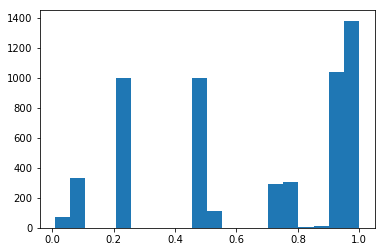

In [ ]:
%time pipe.supervise()

In [ ]:
%time pipe.classify()